In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def RSSI_plot(file_name, title):
    # Read data from the CSV file, ensuring that column names are stripped of leading/trailing spaces
    df_raw = pd.read_csv(file_name).rename(columns=lambda x: x.strip())

    # Ensure "RSSI" is treated as a string for proper comparison
    df_raw["RSSI"] = df_raw["RSSI"].astype(str)

    # Prepare data
    parsed_data = []

    for index, row in df_raw.iterrows():
        if "CRC error!" in row["RSSI"]:
            # Extract time and mark CRC error
            timestamp_str = row["Time"]
            parsed_data.append([np.nan, timestamp_str, True])
        else:
            # Extract RSSI and time
            rssi = float(row["RSSI"])
            timestamp_str = row["Time"]
            parsed_data.append([rssi, timestamp_str, False])

    # Convert to DataFrame
    df = pd.DataFrame(parsed_data, columns=["RSSI", "Time", "CRC_Error"])
    df["Time"] = pd.to_datetime(df["Time"])

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(df["Time"], df["RSSI"], label="RSSI", marker='o', linestyle='-')
    plt.xlabel("Time")
    plt.ylabel("RSSI (dBm)")
    plt.title(title)
    plt.xticks(rotation=45)

    # Highlight CRC errors
    crc_errors = df[df["CRC_Error"]]
    min_rssi = df["RSSI"].min(skipna=True)
    plt.scatter(crc_errors["Time"], [min_rssi] * len(crc_errors), color='red', label="CRC Error", zorder=5)

    plt.legend()
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
title = "RUN 1: Receiver on Track"
file_name = "SAE_RUN_1_CLOSE_SF_8.csv"
RSSI_plot(file_name, title)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

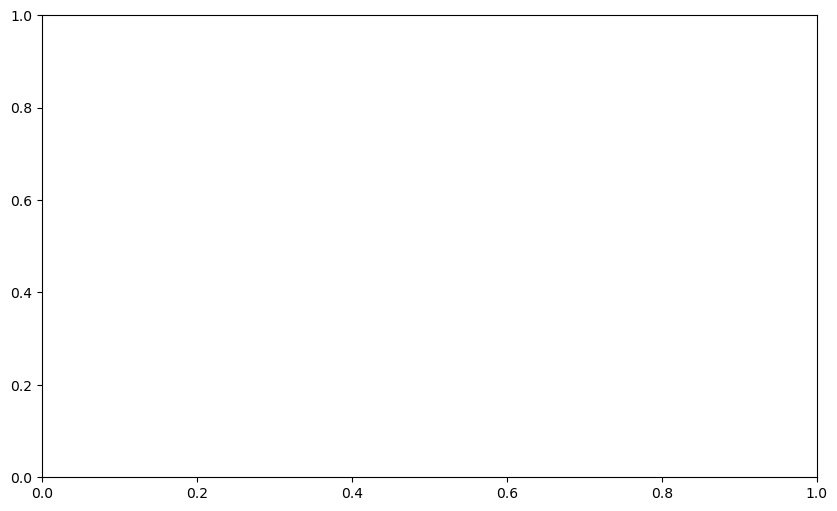

In [13]:
# SAE_RUN_1_CLOSE_SF_8
title = "RUN 1: Receiver on Track"
file_name = "SAE_RUN_1_CLOSE_SF_8.csv"
RSSI_plot(file_name, title)


/tmp/ipykernel_41191/2244210285.py:42: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf["CRC_Error"]].plot(ax=ax, marker='o', color='red', label='CRC Error', zorder=4)


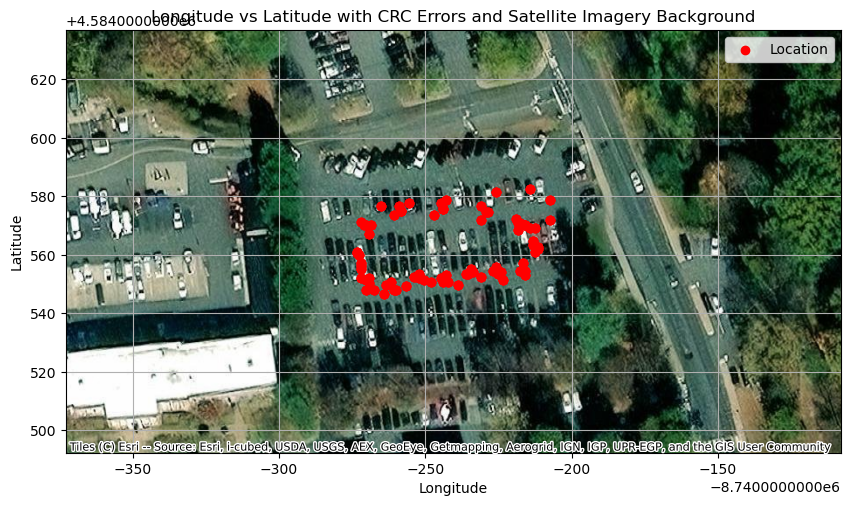

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

def GEO_plot():
    # Read data from the CSV file, ensuring that column names are stripped of leading/trailing spaces
    df_raw = pd.read_csv('data.csv').rename(columns=lambda x: x.strip())

    # Ensure "RSSI", "Latitude", and "Longitude" are treated as strings for proper comparison
    df_raw["RSSI"] = df_raw["RSSI"].astype(str)
    df_raw["Latitude"] = df_raw["Latitude"].astype(str)
    df_raw["Longitude"] = df_raw["Longitude"].astype(str)

    # Prepare data
    parsed_data = []

    for index, row in df_raw.iterrows():
        if "CRC error!" in row["RSSI"]:
            # Mark CRC error
            parsed_data.append([np.nan, np.nan, True])
        else:
            # Extract Latitude and Longitude
            latitude = float(row["Latitude"])
            longitude = float(row["Longitude"])
            parsed_data.append([latitude, longitude, False])

    # Convert to DataFrame
    df = pd.DataFrame(parsed_data, columns=["Latitude", "Longitude", "CRC_Error"])

    # Convert to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    # Define the coordinate reference system (CRS)
    gdf = gdf.set_crs(epsg=4326)  # WGS84
    gdf = gdf.to_crs(epsg=3857)  # Web Mercator for OSM compatibility

    # Plot with a background map
    fig, ax = plt.subplots(figsize=(10, 6))
    gdf.plot(ax=ax, marker='o', color='red', label='Location', zorder=3)
    gdf[gdf["CRC_Error"]].plot(ax=ax, marker='o', color='red', label='CRC Error', zorder=4)

    # Calculate the bounds of the points to zoom out
    x_min, y_min, x_max, y_max = gdf.total_bounds
    x_buffer = (x_max - x_min) * 1.5  # Expand horizontally by a factor of 3
    y_buffer = (y_max - y_min) * 1.5  # Expand vertically by a factor of 3
    ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
    ax.set_ylim(y_min - y_buffer, y_max + y_buffer)

    # Add satellite basemap
    ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Longitude vs Latitude with CRC Errors and Satellite Imagery Background")
    plt.legend()
    plt.grid(visible=True)
    plt.show()


GEO_plot()

# RSSI vs Time plots (Higher RSSI is better signal integrity)
## First run with Formula car 

Here we had the receiver on the track with the car.


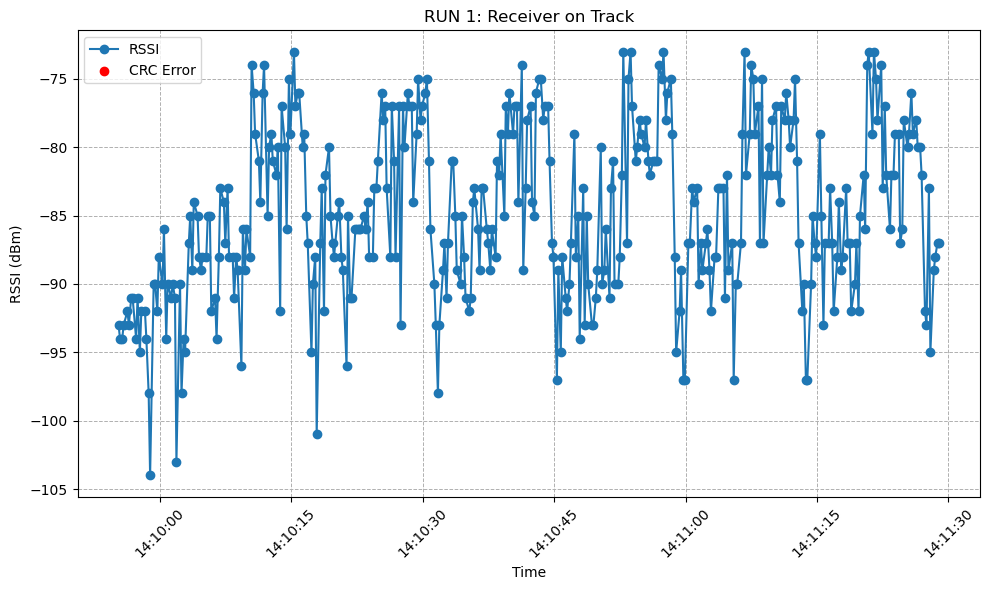

In [ ]:
title = "RUN 2: Receiver on track"
file_name = "SAE_RUN_2_SF_8.csv"
RSSI_plot(file_name, title)

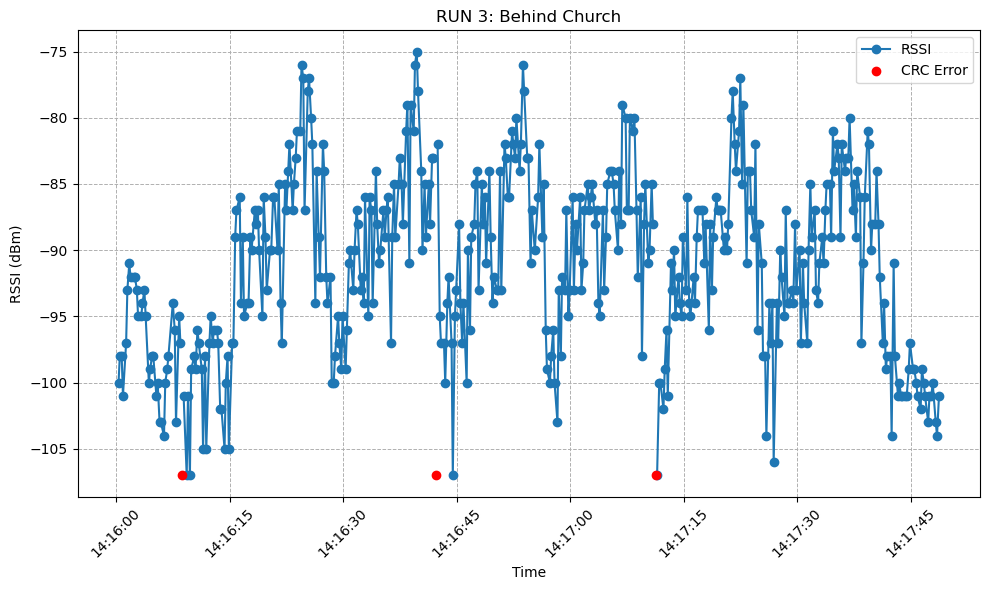

In [ ]:
title = "RUN 3: Behind Church"
file_name = "SAE_RUN_3_SF_8_BEHIND_CHURCH.csv"
RSSI_plot(file_name, title)

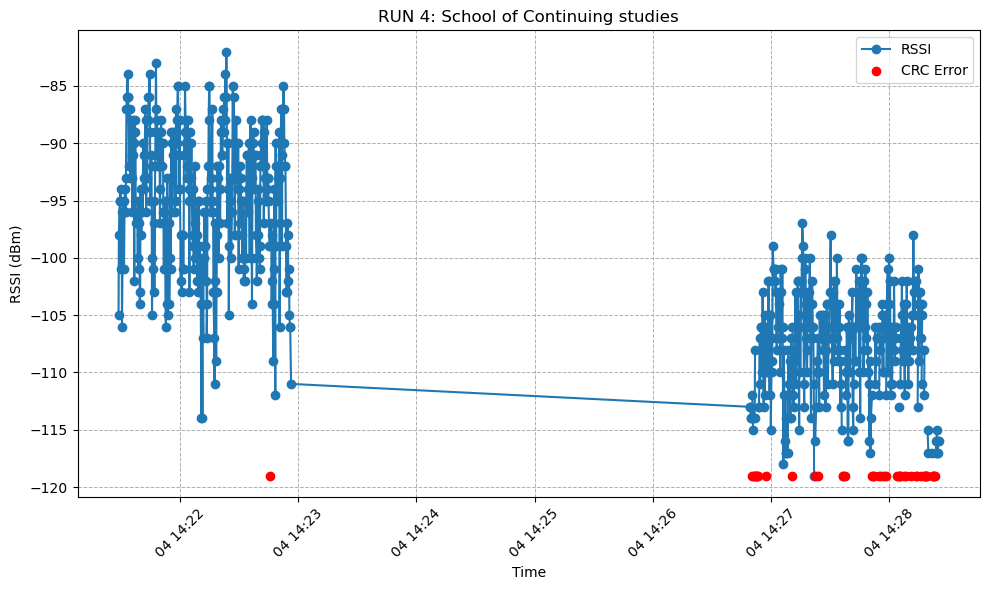

In [ ]:
title = "RUN 4: School of Continuing studies"
file_name = "SAE_RUN_6_SF_9_BIG_ANTENNA_SCHOOLCONTINUINTSTUDIES.csv"
RSSI_plot(file_name, title)

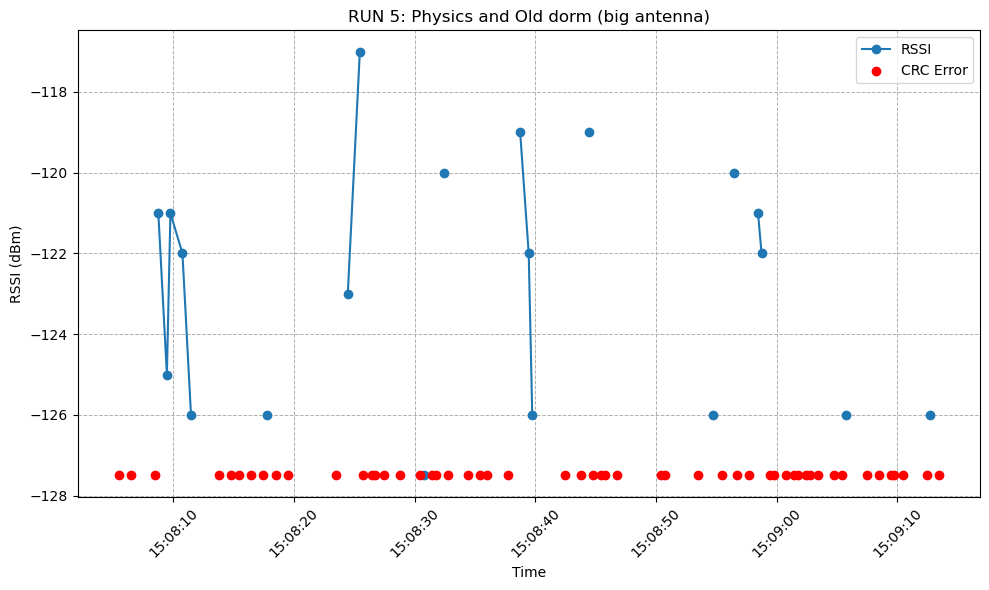

In [ ]:
# RUN_7_SF_9_BIG_ANTENNA_PHYSICS_AND_OLDDORMS.csv

title = "RUN 5: Physics and Old dorm (big antenna)"
file_name = "RUN_7_SF_9_BIG_ANTENNA_PHYSICS_AND_OLDDORMS.csv"
RSSI_plot(file_name, title)

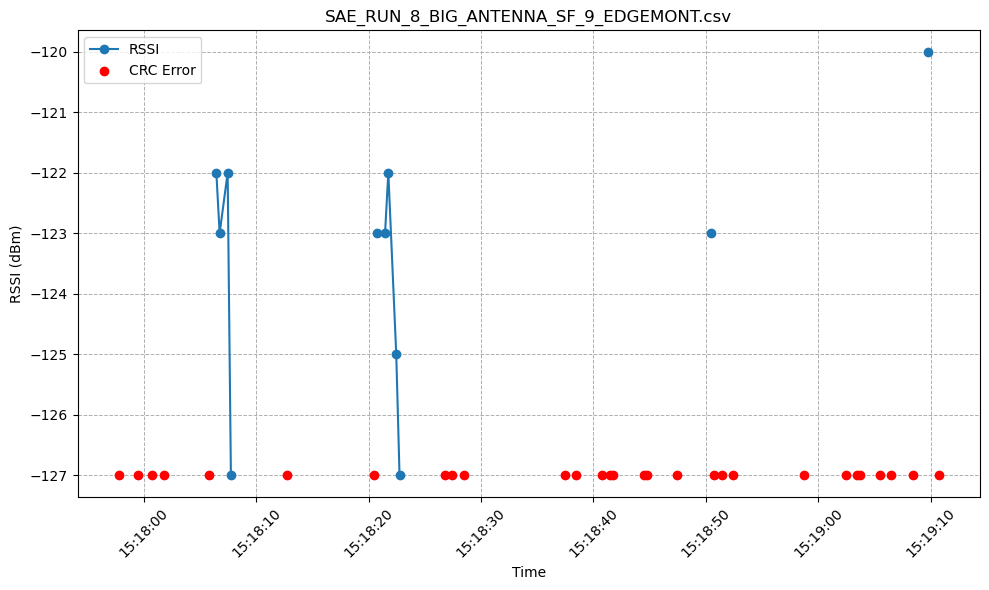

In [ ]:
# SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv

title = "SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv"
file_name = "SAE_RUN_8_BIG_ANTENNA_SF_9_EDGEMONT.csv"
RSSI_plot(file_name, title)

In [ ]:
# Single lap isolated

